<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# Statistics, Probability and Inference

Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [0]:
import numpy as np

mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [35]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 0.01 # return absolute (+ value of number)

True

In [36]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

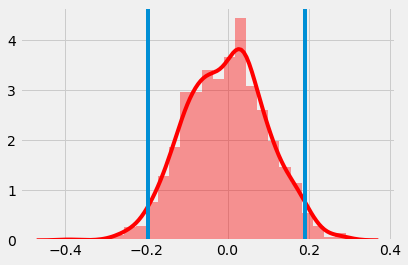

In [37]:
import seaborn as sns
from matplotlib import style
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import numpy as np

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0)

## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [38]:
# t_distribution
t_df10 = np.random.standard_t(df=10, size=10,)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)
t_df10

array([ 0.6286617 ,  0.03225685, -2.23770783, -0.62770146,  0.16136555,
       -1.76002631,  0.50905486,  0.95774347, -0.18867474,  0.59141814])

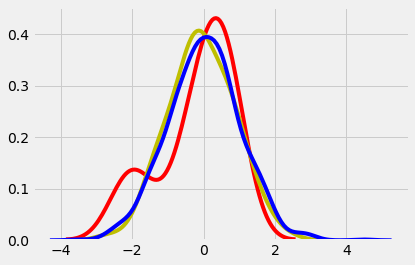

In [39]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [40]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.19336097698346805
Standard Deviation: 1.005446728849672
Variance: 1.0109231245545058
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.051091604783304635
Standard Deviation: 0.9088116557064162
Variance: 0.8259386255478376
t - distribution with 1000 degrees of freedom
------------------------------
Mean: 0.00891309930773463
Standard Deviation: 1.0179697609368028
Variance: 1.0362624341817313


In [41]:
import pandas as pd

# Missing LAR (no team roster page on NFL.com)
teams = ['ARI','ATL','BAL','BUF','CAR','CHI','CIN','CLE','DAL','DEN','DET','GB','HOU',
         'IND','JAX','KC','LAC','MIA','MIN','NE','NO','NYG','NYJ','OAK','PHI',
         'PIT','SEA','SF','TB','TEN','WAS']    

df_list = []
for team in teams: 
    df = pd.read_html(f'http://www.nfl.com/teams/roster?team={team}')[1]
    df['Team'] = team
    df.columns = ['No','Name','Pos','Status','Height','Weight','Birthdate','Exp','College','Team']
    df_list.append(df)
    
final_df = pd.concat(df_list, ignore_index=True)
print(final_df.shape)
final_df.head()

(2917, 10)


,No,Name,Pos,Status,Height,Weight,Birthdate,Exp,College,Team
0,23,"Alford, Robert",CB,ACT,"5'10""",186,11/1/1988,7,Southeastern Louisiana,ARI
1,97,"Allen, Zach",DE,ACT,"6'5""",285,8/20/1997,0,Boston College,ARI
2,3,"Anderson, Drew",QB,ACT,"6'4""",221,10/18/1995,0,Murray State,ARI
3,71,"Bailey, Sterling",DE,ACT,"6'3""",296,9/13/1992,1,Georgia,ARI
4,32,"Baker, Budda",SS,ACT,"5'10""",195,1/10/1996,3,Washington,ARI


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!

#

In [0]:
# Creating sample of 1000 and 800
burnerA=np.random.normal(180,5,1000)
burnerB=np.random.normal(178.5,4.25,800)

In [44]:
#look first 10
burnerA[:10]

array([168.2954489 , 179.91576502, 180.14443182, 174.9162534 ,
       180.46619929, 181.72210022, 183.10472719, 186.28911078,
       180.75982114, 179.61825187])

In [45]:
burnerB[:10]

array([180.40853099, 181.44199609, 177.9763831 , 178.70726185,
       178.03526738, 175.23510835, 177.24320462, 176.47793302,
       181.36019304, 175.61921115])

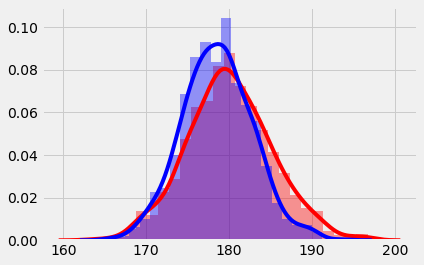

In [46]:
sns.distplot(burnerA, color='r')
sns.distplot(burnerB, color='b')

# Four parts of T-test

1) Null Hypothesis - Boring Hypothsis- The default state of the world
- The  cooking time between two burners are same: $\mu_{1} = \mu_{2} $

2) Alternative hypothesis

-Cokking times are same $\mu_{1} \ne \mu_{2} $

3) T-statistic- the no of standard deviatiions away from mean that corresponds to the difference in the mean that we have observed given their sample size

4) p_value- probability that we have observed(the t-statistic that we get) could have happened by random chance(cooking time between two burner)

##confidence level of 95%
- p<1 - (confidence level)= $\alpha\$

reject the null hypothesis when pvalue is less than $\alpha\$

For 99% confidence (p<1-0.99)= p<0.01

For 95% confidence (p< 1-0.95)= p<0.05

For 90% confidence (p<1-0.90)= p<0.1

due to calculating t-statistic which correspond to p-value=0.000000025 we  reject the null hypothesis that two burners are same

In [47]:
tstat, pvalue = ttest_ind(burnerA, burnerB)
print(tstat)
print(pvalue)

6.564428381927018
6.814057137281977e-11


due to p<0.01 i would reject the null hypothesis(mean1=mean2)

In [48]:
#compute stander deviation
for sample in [burnerA, burnerB]:
  #mu=sample.mean()
  #print('Mean: {}'.format(mu))
  print(f'Mean: {sample.mean()}') # compute variable in the string/ calculate during print
  print(f'Stdv:{sample.std()}')
  print('------------')


Mean: 180.05711823450793
Stdv:5.150779658278227
------------
Mean: 178.57392352702234
Stdv:4.22266592439829
------------


In [49]:
from sklearn.datasets import load_wine

X = load_wine()
X

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [50]:
import pandas as pd
wine= pd.DataFrame(X['data'], columns=X['feature_names'] )
wine['origin']= X['target']
print(wine.shape)
wine.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,origin
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [51]:
wine.origin.value_counts()

1    71
0    59
2    48
Name: origin, dtype: int64

In [52]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
origin                          178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.5 KB


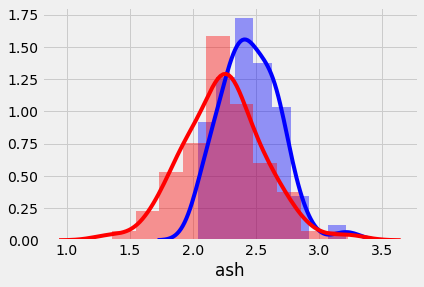

In [53]:
  sns.distplot(wine[wine['origin']==0]['ash'], color= 'b')
sns.distplot(wine[wine['origin']==1]['ash'], color= 'r')

In [54]:
  tstat, pvalue= ttest_ind(wine[wine['origin']==0]['ash'],wine[wine['origin']==1]['ash'])
  print(tstat)
  print(pvalue)

4.289939677230197
3.492813898383007e-05


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


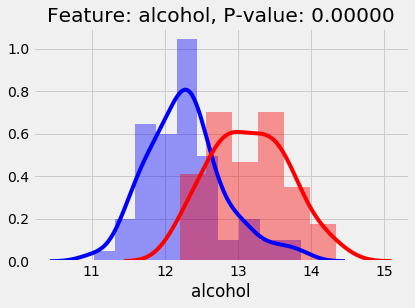

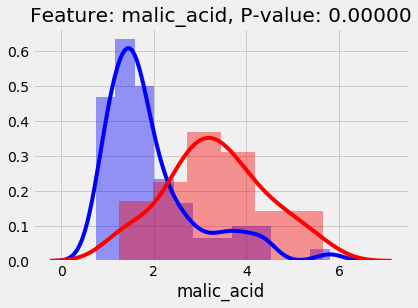

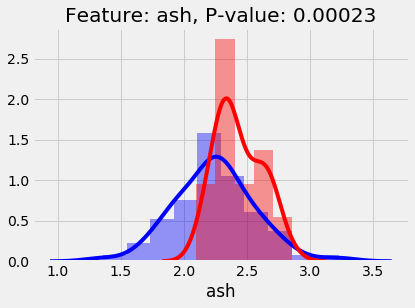

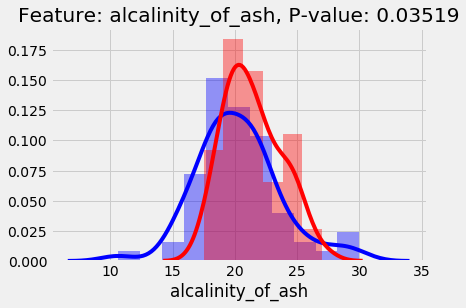

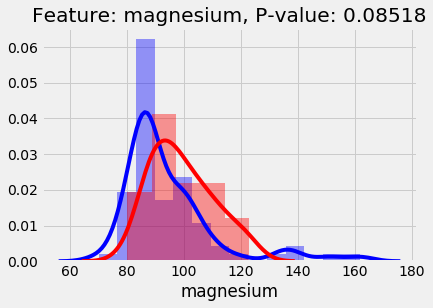

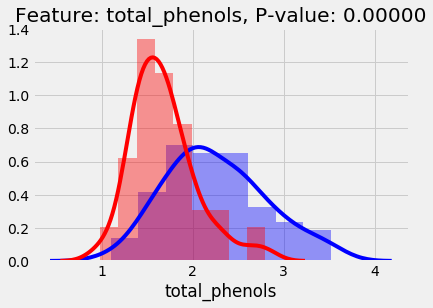

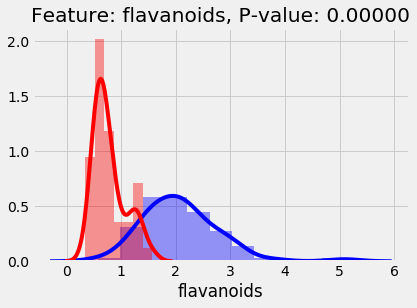

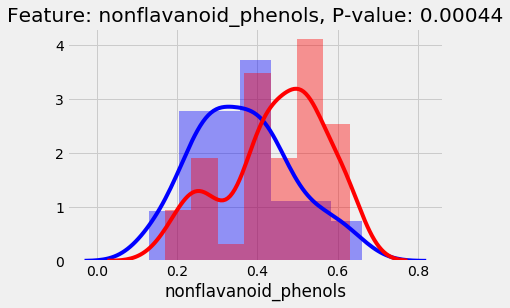

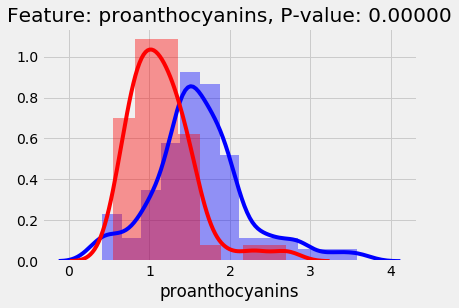

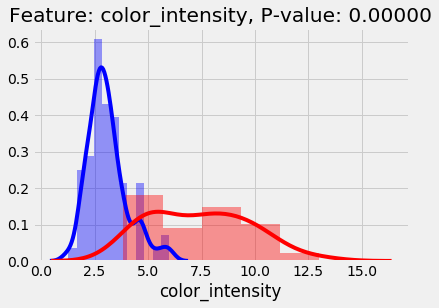

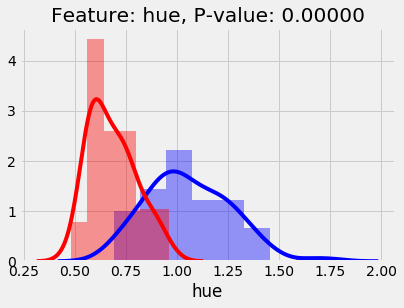

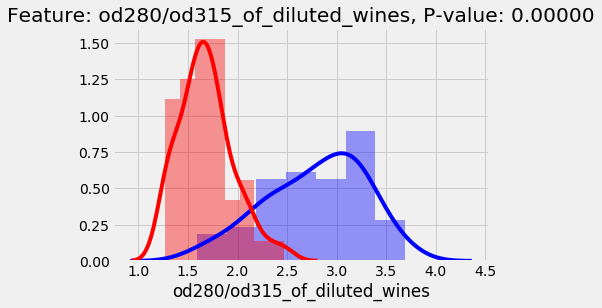

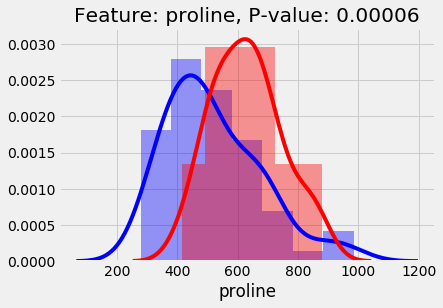

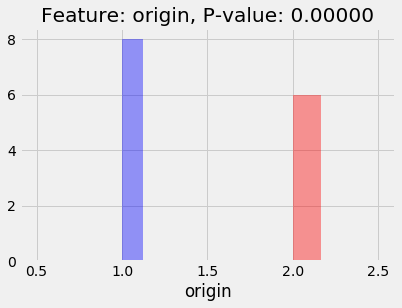

<Figure size 432x288 with 0 Axes>

In [55]:
 import matplotlib.pyplot as plt

for feat in wine.columns:
  # Split groups
  group1 = wine[wine['origin'] == 1][feat]
  group2 = wine[wine['origin'] == 2][feat]
  
  # Plot distribution
  sns.distplot(group1, color = 'b')
  sns.distplot(group2, color = 'r')
  
  
  # Run t-test
  _, pvalue = ttest_ind(group1, group2)
  
  # Plot
  plt.title(f'Feature: {feat}, P-value: {pvalue:.5f}')
  plt.figure()

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means